In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [3]:
! ls

datalab  drive


In [0]:
import os
import numpy as np
import cv2
import  matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Final Function

In [0]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1000
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

In [0]:
def findKeypoint(imPath, params):
  im = mpimg.imread(imPath)
  detector = cv2.SimpleBlobDetector_create(params)
  
  #Image crop/filtering
  im = im[100:250, 100:800]
  im = cv2.GaussianBlur(im,(3,3),0)
  
  #Detect blobs
  keypoints = detector.detect(im)
  
#   #Draw Keypoints
#   im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
#   imgplot = plt.imshow(im_with_keypoints)
#   plt.show()
  
  #Extract Keypoint Infp
  if len(keypoints) > 0:
    x, y = keypoints[0].pt[0],keypoints[0].pt[1]
    size = keypoints[0].size

    return x, y, size
  
  return 0, 0, 0

In [0]:
def findDirection(imFolder):
  
  numImages = len(os.listdir(imFolder))
  
  xList, yList, sizeList = [], [], []

  for i in range(0, numImages):
    imName = "test" + str(i) + ".jpg"
    imPath = "drive/" + imName
    x, y, size = findKeypoint(imPath, params)
#     print(x,y,size)

    xList.append(x)
    yList.append(y)
    sizeList.append(size)
  
  xList = np.asarray(xList)
  yList = np.asarray(yList)
  sizeList = np.asarray(sizeList)
  
  indices = np.where(xList > 0)

  if len(indices[0]) > 1:
    start, end = indices[0][0], indices[0][-1]
    if xList[start] > xList[end]:
      status = "leaving"
      
    elif xList[start] < xList[end]:
      status = "departing"
      
  else:
    status = "no change"
  
  return status

In [136]:
imFolder = "drive/testImages"

print("Status: ", findDirection(imFolder))

Status:  leaving


# Final Function Testing

In [0]:
def findKeypoint(imPath, params):
  im = mpimg.imread(imPath)
  detector = cv2.SimpleBlobDetector_create(params)
  
  #Image crop/filtering
  im = im[100:250, 100:800]
  im = cv2.GaussianBlur(im,(3,3),0)
  
  #Detect blobs
  keypoints = detector.detect(im)
  
  #Draw Keypoints
  im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
  imgplot = plt.imshow(im_with_keypoints)
  plt.show()
  
  #Extract Keypoint Infp
  if len(keypoints) > 0:
    x, y = keypoints[0].pt[0],keypoints[0].pt[1]
    size = keypoints[0].size

    return x, y, size
  
  return 0, 0, 0

In [0]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1000
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01

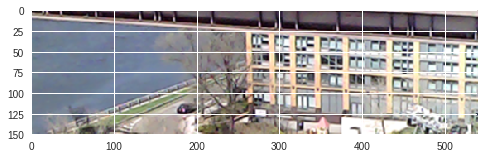

0 0 0


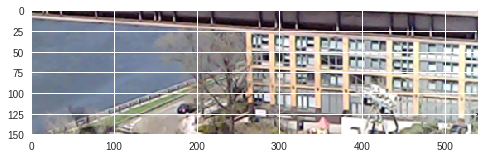

0 0 0


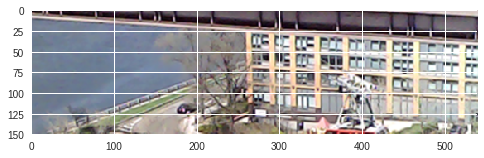

0 0 0


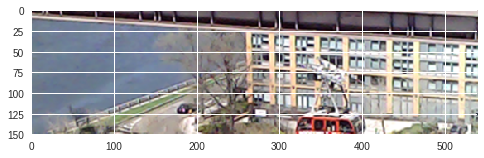

0 0 0


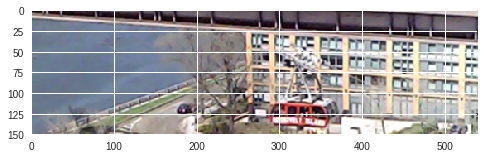

0 0 0


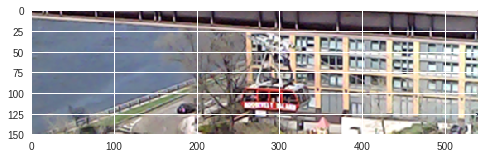

0 0 0


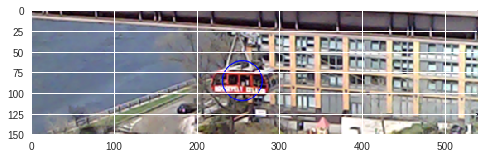

254.78143310546875 85.08746337890625 47.94021224975586


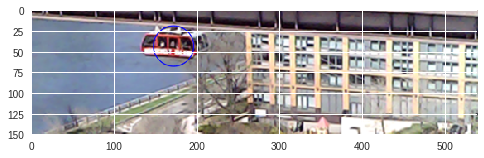

171.76039123535156 43.033790588378906 48.703880310058594


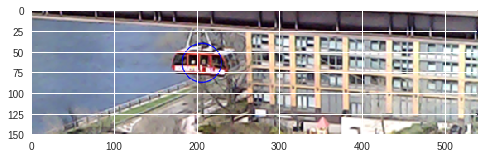

205.90188598632812 63.33883285522461 47.16252136230469


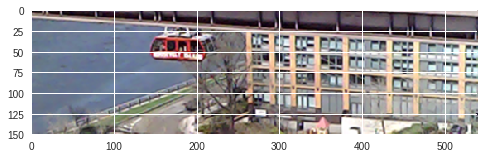

0 0 0


In [106]:
xList, yList, sizeList = [], [], []

for i in range(0, 10):
  imName = "test" + str(i) + ".jpg"
  imPath = "drive/" + imName
  x, y, size = findKeypoint(imPath, params)
  print(x,y,size)
  
  xList.append(x)
  yList.append(y)
  sizeList.append(size)

In [107]:
print(xList)
print(yList)
print(sizeList)

xList = np.asarray(xList)
yList = np.asarray(yList)
sizeList = np.asarray(sizeList)

[0, 0, 0, 0, 0, 0, 254.78143310546875, 171.76039123535156, 205.90188598632812, 0]
[0, 0, 0, 0, 0, 0, 85.08746337890625, 43.033790588378906, 63.33883285522461, 0]
[0, 0, 0, 0, 0, 0, 47.94021224975586, 48.703880310058594, 47.16252136230469, 0]


In [118]:
indices = np.where(xList > 0)

if len(indices[0]) > 1:
  start, end = indices[0][0], indices[0][-1]
  if xList[start] > xList[end]:
    print("leaving")
  else:
    print("arriving")

leaving


# Blob Tracking

In [0]:
im = cv2.imread("drive/2.jpg")

In [0]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 500
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

In [0]:
# Detect blobs.
keypoints = detector.detect(im)

In [0]:
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

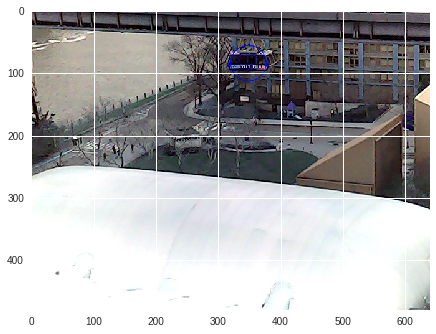

In [7]:
imgplot = plt.imshow(im_with_keypoints)
plt.show()

In [8]:
x, y = keypoints[0].pt[0],keypoints[0].pt[1]
size = keypoints[0].size
print(x,y)
print(size)

348.3761291503906 83.19171905517578
57.116851806640625


# Color

In [0]:
test1 = mpimg.imread("drive/test7.jpg")
test2 = mpimg.imread("drive/test9.jpg")


test1_crop = test1[100:250, 100:800]
test2_crop = test2[100:250, 100:800]

test1_crop = cv2.GaussianBlur(test1_crop,(3,3),0)
test2_crop = cv2.GaussianBlur(test2_crop,(3,3),0)

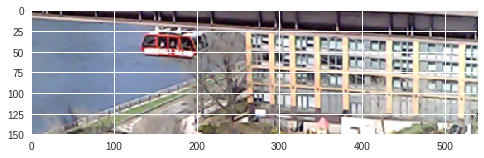

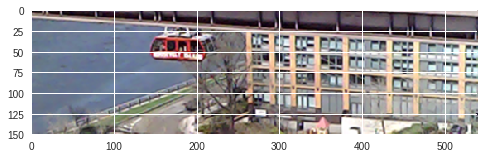

In [78]:
image = test1_crop
imgplot = plt.imshow(image)
plt.show()

image = test2_crop
imgplot = plt.imshow(image)
plt.show()

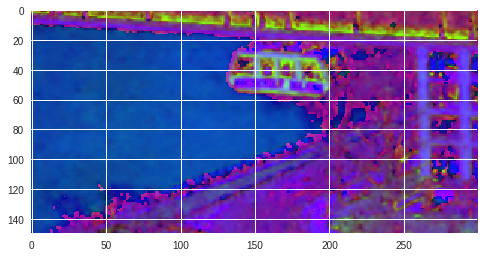

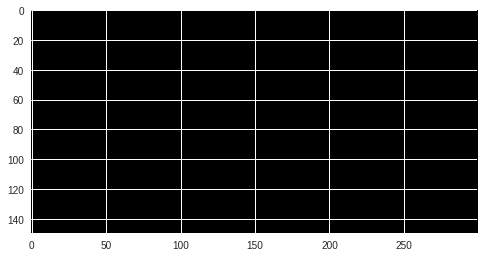

In [76]:
img = test1_crop
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# define range of red color in HSV
redMin = (160,100,100)
redMax = (180, 255, 255)

# Sets pixels to white if in red range, else will be set to black
mask = cv2.inRange(hsv, redMin, redMax)

# Bitwise-AND of mask and red only image - only used for display
res = cv2.bitwise_and(img, img, mask= mask)


imgplot = plt.imshow(hsv)
plt.show()

imgplot = plt.imshow(res)
plt.show()

# Blob


In [0]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 1000
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.1
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.1
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

[<KeyPoint 0x7fb7efb5f780>]


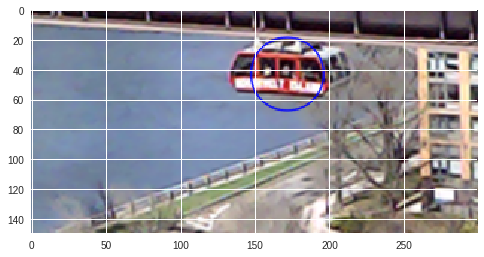

In [61]:
# Detect blobs.
keypoints = detector.detect(test1_crop)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(test1_crop, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(keypoints)

imgplot = plt.imshow(im_with_keypoints)
plt.show()

[]


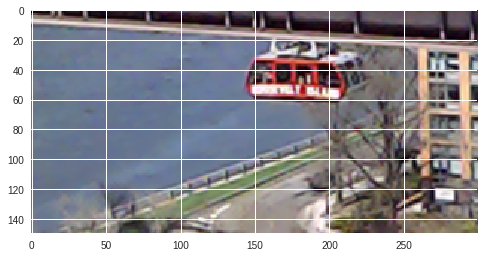

In [62]:
# Detect blobs.
keypoints = detector.detect(test2_crop)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(test2_crop, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(keypoints)

imgplot = plt.imshow(im_with_keypoints)
plt.show()

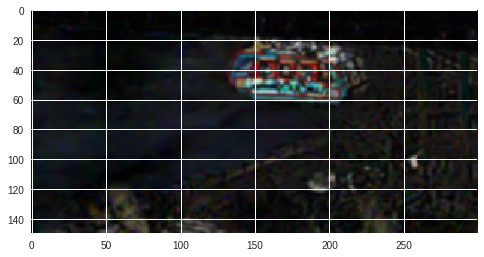

In [63]:
foreground = cv2.absdiff(test1_crop, test2_crop)
img_final = cv2.GaussianBlur(foreground,(3,3),0)
imgplot = plt.imshow(img_final)
plt.show()

[<KeyPoint 0x7fb7f33e7f90>]


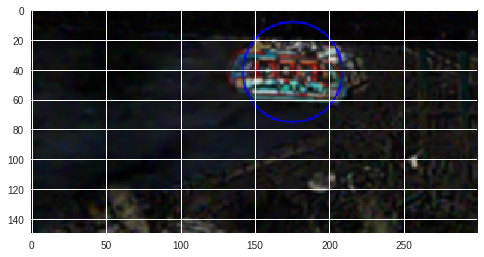

In [64]:
# Detect blobs.
keypoints = detector.detect(img_final)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img_final, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(keypoints)

imgplot = plt.imshow(im_with_keypoints)
plt.show()

# RGB

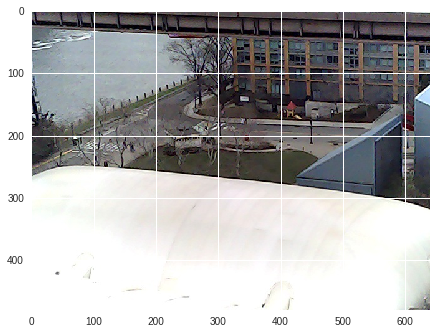

In [87]:
imgplot = plt.imshow(im1)
plt.show()

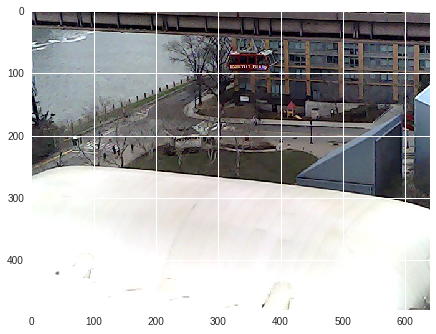

In [88]:
imgplot = plt.imshow(im2)
plt.show()

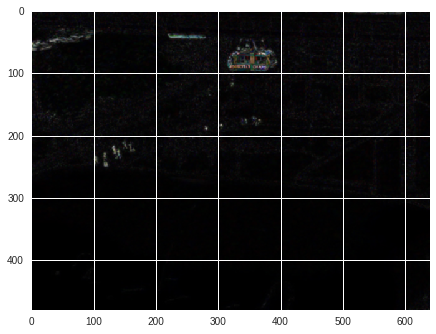

In [107]:
foreground = cv2.absdiff(im1,im2)
img_final = cv2.GaussianBlur(foreground,(3,3),0)
imgplot = plt.imshow(img_final)
plt.show()

In [0]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Filter by Area.
params.filterByArea = True
params.minArea = 100
 
# Filter by Circularity
params.filterByCircularity = False
params.minCircularity = 0.1
 
# Filter by Convexity
params.filterByConvexity = False
params.minConvexity = 0.87
 
# Filter by Inertia
params.filterByInertia = False
params.minInertiaRatio = 0.01
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
    detector = cv2.SimpleBlobDetector(params)
else : 
    detector = cv2.SimpleBlobDetector_create(params)

[]


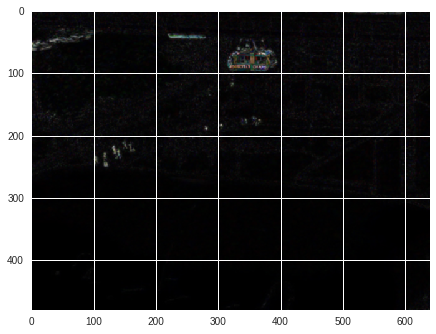

In [111]:
# Detect blobs.
keypoints = detector.detect(img_final)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(img_final, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(keypoints)

imgplot = plt.imshow(im_with_keypoints)
plt.show()
